In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [14]:
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

train_datagen = ImageDataGenerator (
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range =10,
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train', 
    target_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = 32,
    class_mode= 'sparse'
)

Found 1506 images belonging to 3 classes.


In [15]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [16]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [17]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.77947915 0.7206556  0.7481066 ]
  [0.63712144 0.5782979  0.6057489 ]
  [0.8436355  0.784812   0.81226295]
  ...
  [0.7242773  0.6654538  0.6929048 ]
  [0.7259721  0.6671486  0.69459957]
  [0.7276669  0.6688434  0.69629437]]

 [[0.80207634 0.7432528  0.7707038 ]
  [0.6574589  0.5986354  0.62608635]
  [0.8023957  0.7435721  0.77102315]
  ...
  [0.72724265 0.6684191  0.6958701 ]
  [0.7266777  0.6678542  0.69530517]
  [0.7261128  0.66728926 0.69474024]]

 [[0.82467353 0.76585    0.793301  ]
  [0.6777964  0.6189729  0.6464239 ]
  [0.7611558  0.70233226 0.72978324]
  ...
  [0.70420766 0.64538413 0.6728351 ]
  [0.69855833 0.6397348  0.6671858 ]
  [0.692909   0.6340855  0.66153646]]

 ...

 [[0.69411767 0.61960787 0.6431373 ]
  [0.69411767 0.61960787 0.6431373 ]
  [0.69411767 0.61960787 0.6431373 ]
  ...
  [0.52413166 0.457465   0.48883754]
  [0.5422158  0.47554913 0.5069217 ]
  [0.57527286 0.5086062  0.53997874]]

 [[0.6647703  0.5902605  0.6137899 ]
  [0.65573144 0.58122164 0.60475105]


In [18]:
validation_datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = True,
        rotation_range =10,)

validation_generator = validation_datagen.flow_from_directory(
        'dataset/val', 
        target_size = (IMAGE_SIZE, IMAGE_SIZE),
        batch_size = 32,
        class_mode= 'sparse'
)

Found 215 images belonging to 3 classes.


In [19]:
test_datagen = ImageDataGenerator(
        rescale = 1./255,
        horizontal_flip = True,
        rotation_range =10,)

test_generator = test_datagen.flow_from_directory(
        'dataset/test', 
        target_size = (IMAGE_SIZE, IMAGE_SIZE),
        batch_size = 32,
        class_mode= 'sparse'
)

Found 431 images belonging to 3 classes.


In [20]:
input_shape =(IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model= models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
    
])

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)       

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
1506/32

47.0625

In [24]:
history = model.fit(
    train_generator,
    steps_per_epoch= 47,
    validation_data = validation_generator,
    validation_steps = 6,
    verbose =1,
    epochs = EPOCHS
)

Epoch 1/50
47/47 [==============================] - 70s 1s/step - loss: 0.8838 - accuracy: 0.4837 - val_loss: 0.8041 - val_accuracy: 0.6406
Epoch 2/50
47/47 [==============================] - 71s 1s/step - loss: 0.7165 - accuracy: 0.6689 - val_loss: 0.6178 - val_accuracy: 0.6979
Epoch 3/50
47/47 [==============================] - 75s 2s/step - loss: 0.5189 - accuracy: 0.7639 - val_loss: 0.4695 - val_accuracy: 0.8021
Epoch 4/50
47/47 [==============================] - 78s 2s/step - loss: 0.3960 - accuracy: 0.8426 - val_loss: 0.2872 - val_accuracy: 0.8906
Epoch 5/50
47/47 [==============================] - 71s 2s/step - loss: 0.2890 - accuracy: 0.8833 - val_loss: 0.3065 - val_accuracy: 0.8542
Epoch 6/50
47/47 [==============================] - 66s 1s/step - loss: 0.2708 - accuracy: 0.8910 - val_loss: 0.2131 - val_accuracy: 0.9115
Epoch 7/50
47/47 [==============================] - 88s 2s/step - loss: 0.3123 - accuracy: 0.8820 - val_loss: 0.2380 - val_accuracy: 0.9010
Epoch 8/50
47/47 [==

In [25]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 8s 605ms/step - loss: 0.1768 - accuracy: 0.9606


In [26]:
scores

[0.17683976888656616, 0.9605568647384644]

In [27]:
history

In [28]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 47}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
history.history['accuracy']

[0.48371776938438416,
 0.6689280867576599,
 0.7639077305793762,
 0.8426051735877991,
 0.8833107352256775,
 0.8909574747085571,
 0.8819538950920105,
 0.9321573972702026,
 0.9396200776100159,
 0.9409769177436829,
 0.9375,
 0.9185888767242432,
 0.9375848174095154,
 0.9491180181503296,
 0.9565807580947876,
 0.9531885981559753,
 0.9708276987075806,
 0.972862958908081,
 0.9559022784233093,
 0.9687923789024353,
 0.9674355387687683,
 0.9464043378829956,
 0.9620081186294556,
 0.9694707989692688,
 0.9579375982284546,
 0.9592944383621216,
 0.9810040593147278,
 0.987109899520874,
 0.9891451597213745,
 0.98439621925354,
 0.9769335389137268,
 0.9877883195877075,
 0.988466739654541,
 0.9905020594596863,
 0.9837177991867065,
 0.9920212626457214,
 0.9926861524581909,
 0.988466739654541,
 0.9864314794540405,
 0.9823608994483948,
 0.9918588995933533,
 0.9891451597213745,
 0.9810040593147278,
 0.9932157397270203,
 0.9932157397270203,
 0.9993215799331665,
 0.9891451597213745,
 0.9911804795265198,
 0.999321

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

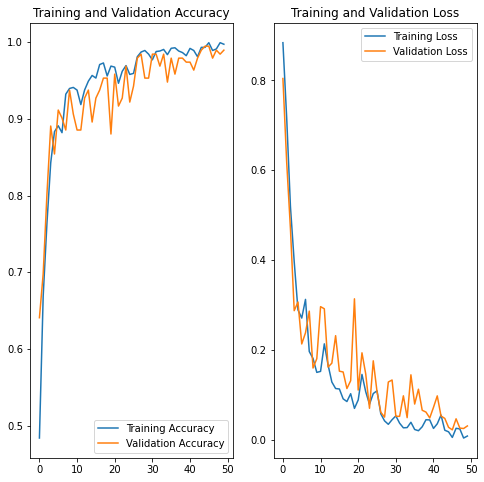

In [32]:

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Potato___Early_blight
predicted label: Potato___Early_blight


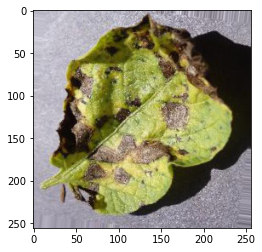

In [33]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [34]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions= model.predict(img_array)
    
    predicted_class= [class_names[np.argmax(predictions[0])]]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

In [36]:
model.save("./potatoes.h5")